<a href="https://colab.research.google.com/github/TomMcIver/Q-Stock/blob/Data/Q_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Install Required Packages
try:
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
except ImportError as e:
    print(f"Error importing packages: {e}")
    !pip install numpy pandas scipy
    import numpy as np
    import pandas as pd
    from scipy.stats import norm

print("✅ Packages installed successfully")

✅ Packages installed successfully


Generated stock prices:
               Stock_1     Stock_2     Stock_3     Stock_4    Stock_5
2023-01-01  105.751313  192.393507  160.699718  141.379499  73.073882
2023-01-02  105.075181  187.906225  161.734544  141.591588  73.253771
2023-01-03  103.230959  181.893063  159.237608  142.827039  74.065543
2023-01-04  103.864979  181.308322  157.441790  143.779344  74.015246
2023-01-05  104.409328  172.506372  159.347419  145.737887  74.720310

Starting prices for each stock:
Stock_1: $106.18
Stock_2: $192.61
Stock_3: $159.80
Stock_4: $139.80
Stock_5: $73.40


<Figure size 1000x600 with 0 Axes>

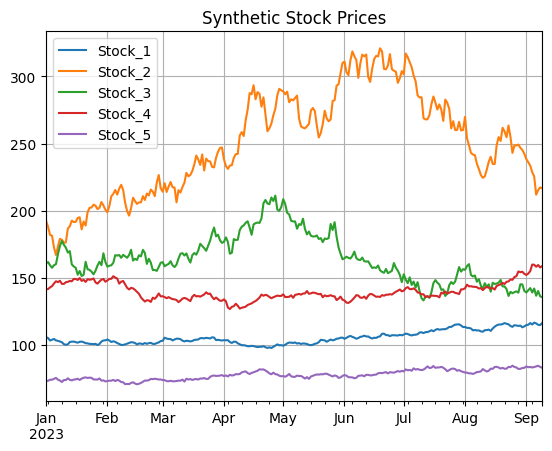

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    np.random.seed(42)
    days = 252
    stocks = 5


    start_prices = np.random.uniform(50, 200, stocks)

    # drifts and volatilities
    mu = np.random.uniform(-0.1, 0.2, stocks)
    sigma = np.random.uniform(0.1, 0.4, stocks)

    dates = pd.date_range(start="2023-01-01", periods=days)
    prices = pd.DataFrame(index=dates)

    # GBM Simulation
    for i in range(stocks):
        dt = 1/days
        shock = np.random.normal(0, np.sqrt(dt), days)
        returns = (mu[i] - 0.5*sigma[i]**2)*dt + sigma[i]*shock
        prices[f'Stock_{i+1}'] = start_prices[i] * np.exp(returns.cumsum())

    print("Generated stock prices:")
    print(prices.head())
    print("\nStarting prices for each stock:")
    for i in range(stocks):
        print(f"Stock_{i+1}: ${start_prices[i]:.2f}")

    plt.figure(figsize=(10,6))
    prices.plot(title="Synthetic Stock Prices")
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error generating stock prices: {e}")